<a href="https://colab.research.google.com/github/FGalvao77/Previsao-de-incendios-florestais-usando-ML/blob/main/Previs%C3%A3o_de_inc%C3%AAndios_florestais_usando_aprendizado_de_m%C3%A1quina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Previsão de incêndios florestais usando aprendizado de máquina**

---



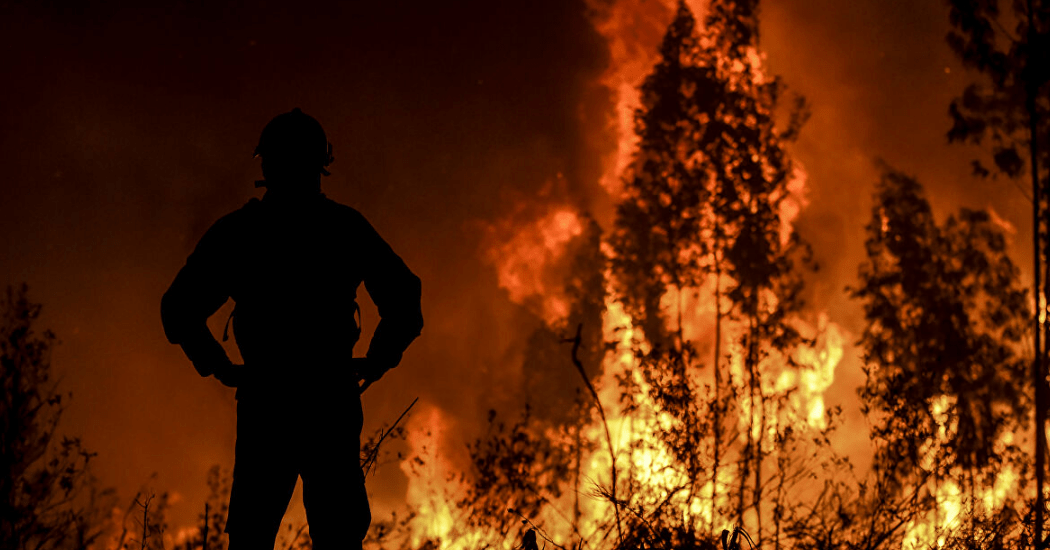

**Introdução**

Incêndios florestais são [queimadas](https://www.infoescola.com/ecologia/queimadas/) de grandes proporções que geram impactos sociais e ambientais onde ocorrem. De acordo com o Laboratório de Proteção Florestal da Universidade Federal do Paraná (UFPR), a ocorrência dos incêndios está relacionada aos combustíveis inflamáveis expostos a materiais acesos. O combate do fogo pode ser feito removendo-se a fonte de fogo e também se removendo do local material que possa queimar.

As áreas florestais abrigam uma grande [diversidade de espécies](https://www.infoescola.com/geografia/biodiversidade/) além de apresentar um papel ecológico importante na absorção de [carbono](https://www.infoescola.com/elementos-quimicos/carbono/) e também fornecer [oxigênio](https://www.infoescola.com/elementos-quimicos/oxigenio/) à [atmosfera](https://www.infoescola.com/geografia/atmosfera/). Assim, trata-se de uma área valiosa sendo importante controlar e prevenir incêndios nessas áreas. Ainda de acordo com o Laboratório de Proteção Florestal, o controle das fontes de risco depende do conhecimento de como essas fontes operam no local, quando e onde os incêndios costumam ocorrer. Os programas de prevenção dependem do registro dessas informações sobre frequência e locais onde os incêndios ocorrem e também de dados como as causas, época e extensão das queimadas.

**Causas**

As causas dos incêndios podem ser de causas naturais, como ocorre muito em algumas regiões do Cerrado brasileiro, mas, a maior parte acontece devido à ação antrópica imprudente. Como exemplos de ações do homem que podem iniciar os incêndios florestais tem-se: pontas de cigarros jogadas nas beiras de estradas, fogueiras mal apagadas, incêndios intencionais feitos por falta de consciência ou até mesmo na busca de espécies animais.

**Como combater**

Formas de combate ao incêndio florestal relacionam-se a utilizar informações estatísticas sobre incêndios anteriores como meio de prevenção a novos incêndios. Também um trabalho educativo com comunidades locais próximas às áreas florestais para evitar atitudes que levem ao risco de incêndios e também a importância das denúncias às autoridades sobre atividades suspeitas na floresta.

- fonte: https://www.infoescola.com/ecologia/incendio-florestal/<br><br>

Portanto, de modo simplificado podezemos dizer que, um _incêndio florestal_, pode ser descrito como qualquer combustão descontrolada e não previsita ou queima de plantas em um ambiente natural, como uma floresta, pastagem, etc. 

Aqui, não estamos determinando se um incêndio florestal ocorrerá ou não, mas sim prevendo a `confiança` do incêndio florestal com base em alguns atributos. Portanto o nosso desafio é criar um sistema (máquina preditiva) para avaliar o `grau de confiança`.

**Por que precisamos de um modelo de previsão de incêndios florestais?**

Talvez esse questionamento pode vim na sua mente! E essa pergunta é muito válida.

Apesar de ter o departamento florestal experiente que tem lidado com essas questões por muito tempo porque é que existe a necessidade de usarmos _machine learning_, tendo dito que a resposta é bastante simples que o departamento florestal experiente pode verificar 3-4 parâmetros de sua mente humana, mas o ML, por outro lado, pode lidar com os inúmeros parâmetros, como: - latitude, longitude, satélite e outros tantos atributos, portanto, lidar com essa relação múltipla de parâmetros é que precisamos de ML!

In [1]:
# import pandas as pd
# import numpy as np
# import datetime as dt

# import matplotlib.pyplot as plt
# %matplotlib inline
# import seaborn as sns

# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.ensemble import RandomForestRegressor

## **Importando o conjunto de dados**

In [2]:
# importando o conjunto de dados de uma url
!wget https://raw.githubusercontent.com/Aman-Preet-Singh-Gulati/Forest-Fire-Predicition/main/fire_archive.csv

--2021-12-21 14:41:22--  https://raw.githubusercontent.com/Aman-Preet-Singh-Gulati/Forest-Fire-Predicition/main/fire_archive.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2860284 (2.7M) [text/plain]
Saving to: ‘fire_archive.csv.2’

fire_archive.csv.2  100%[===================>]   2.73M  --.-KB/s    in 0.07s   

2021-12-21 14:41:22 (41.0 MB/s) - ‘fire_archive.csv.2’ saved [2860284/2860284]



In [3]:
# visualizando o conjunto de dados
!head fire_archive.csv

latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
-11.807,142.0583,313,1,1,2019-08-01,0056,Terra,MODIS,48,6.3,297.3,6.6,D,0
-11.7924,142.085,319.3,1,1,2019-08-01,0056,Terra,MODIS,71,6.3,297.3,11.3,D,0
-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,0057,Terra,MODIS,42,6.3,298.7,23.1,D,0
-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,0057,Terra,MODIS,33,6.3,296.1,6.5,D,0
-12.4953,131.4897,310.3,4,1.9,2019-08-01,0057,Terra,MODIS,36,6.3,298.8,27.6,D,0
-12.6191,142.1998,314.8,1,1,2019-08-01,0057,Terra,MODIS,68,6.3,297.6,9.3,D,0
-14.3655,143.5682,305.4,1.2,1.1,2019-08-01,0057,Terra,MODIS,24,6.3,283.9,5.9,D,0
-14.3195,143.5198,322.9,1.2,1.1,2019-08-01,0057,Terra,MODIS,79,6.3,290.9,20.4,D,0
-13.1654,141.9715,317.2,1,1,2019-08-01,0057,Terra,MODIS,72,6.3,300,9.9,D,0


## **Importando as bibliotecas e carregando o conjunto de dados**

In [4]:
# importando as bibliotecas iniciais
import warnings                         # para ignorar mensagens de alerta
warnings.filterwarnings('ignore')

import pandas as pd                     # para modelagem de dados
import numpy as np                      # para modelagem matemática

In [5]:
# instanciando o conjunto de dados no objeto "df"
df = pd.read_csv('/content/fire_archive.csv')

# visualizando as 5 primeiras linhas
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,Terra,MODIS,48,6.3,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,Terra,MODIS,71,6.3,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,Terra,MODIS,42,6.3,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,Terra,MODIS,33,6.3,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,Terra,MODIS,36,6.3,298.8,27.6,D,0


## **Análise exploratória**

In [6]:
# informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36011 entries, 0 to 36010
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    36011 non-null  float64
 1   longitude   36011 non-null  float64
 2   brightness  36011 non-null  float64
 3   scan        36011 non-null  float64
 4   track       36011 non-null  float64
 5   acq_date    36011 non-null  object 
 6   acq_time    36011 non-null  int64  
 7   satellite   36011 non-null  object 
 8   instrument  36011 non-null  object 
 9   confidence  36011 non-null  int64  
 10  version     36011 non-null  float64
 11  bright_t31  36011 non-null  float64
 12  frp         36011 non-null  float64
 13  daynight    36011 non-null  object 
 14  type        36011 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 4.1+ MB


> Podemos ver que temos _3.6011 linhas e 15 colunas_ em nosso conjunto de dados e, o tipo de dado em cada atributo.<br> Teremos que realizaralguns tratamentos para utilização deste conjunto de dados.

Antes de tudo, vamos explorar mais este conjunto de dados.

In [7]:
# estatística descritiva
df.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,3.601100e+04,36011.000000,36011.000000,36011.000000
mean,-19.100962,138.931446,328.750696,1.620905,1.215281,600.025798,67.551387,6.300000e+00,301.339138,51.132176,0.019439
std,7.265777,9.261400,18.992808,0.813764,0.247852,548.369111,23.179946,3.728625e-12,9.724462,92.280112,0.198326
min,-42.762800,114.104300,300.000000,1.000000,1.000000,0.000000,0.000000,6.300000e+00,267.000000,0.000000,0.000000
25%,-26.370250,131.072250,316.500000,1.100000,1.000000,205.000000,52.000000,6.300000e+00,293.600000,13.800000,0.000000
50%,-15.706500,136.738500,326.400000,1.300000,1.100000,424.000000,70.000000,6.300000e+00,302.400000,25.800000,0.000000
75%,-13.343600,147.477500,336.700000,1.900000,1.300000,600.000000,86.000000,6.300000e+00,308.600000,52.800000,0.000000
max,-10.072600,153.490400,504.400000,4.800000,2.000000,2359.000000,100.000000,6.300000e+00,400.100000,3679.500000,3.000000


In [8]:
# verificando e contabilizando há presença de valores nulos
df.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

> Não temos nenhum valor nulo neste conjunto de dados.

## **Pré-processamento e visualização**

Se por acaso houvesse valores nulos, teriámos diversas estratégias para tratar desse problema, como:
- preencher com a média, a moda e outro valor de medida;
- e eliminar as instâncias.
    - esse tipo de ação, temos que ter muito cuidado. Pois como a incidência de valores nulos pode ser alta e, elimina-los perderemos muitos dados.

In [9]:
# com a função ".dropna()" - eleminamos valores nulos
df.isnull().dropna(inplace=True)
df.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [10]:
# função para separar as colunas numéricas e categóricas do dataframe
def separate_cols(df):
    cols_cats = []
    cols_nums = []

    for col in df.columns:   
        if df.dtypes[col] == 'object':
            cols_cats.append(col)
        else:
            cols_nums.append(col)
    
    return f'cols categ: {len(cols_cats), cols_cats}', f'cols nums: {len(cols_nums), cols_nums}'

In [11]:
# aplicando a função
separate_cols(df)

("cols categ: (4, ['acq_date', 'satellite', 'instrument', 'daynight'])",
 "cols nums: (11, ['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_time', 'confidence', 'version', 'bright_t31', 'frp', 'type'])")

In [12]:
# bibliotecas para visualização gráfica
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

Variáveis Contínuas:
Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_time',
       'confidence', 'version', 'bright_t31', 'frp', 'type'],
      dtype='object')

Visualização das distribuição dos dados


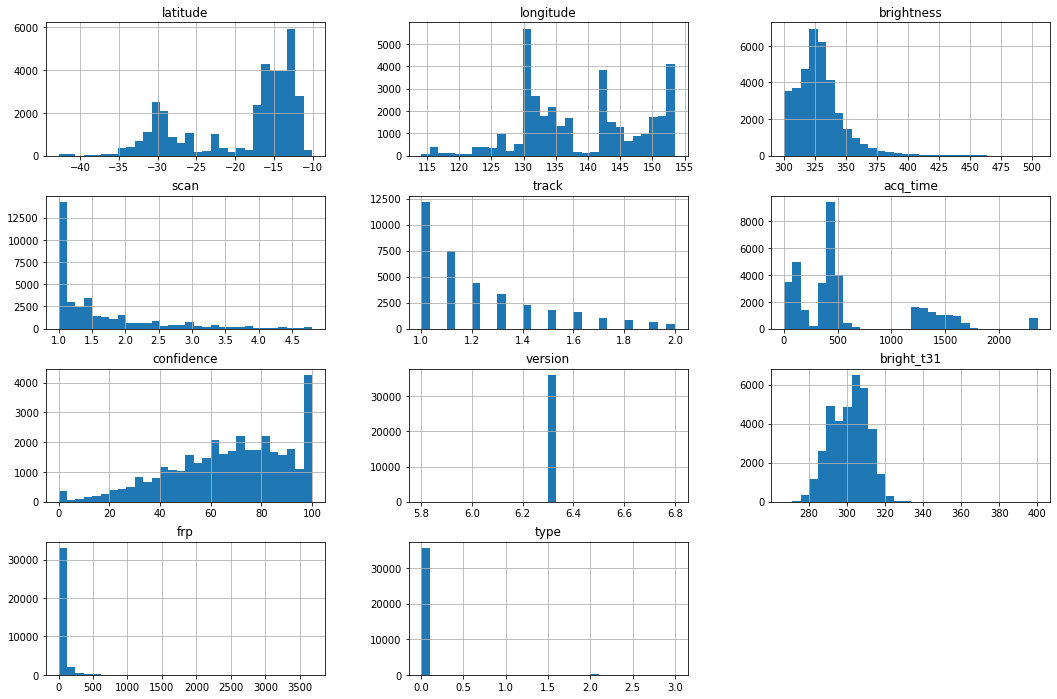

In [13]:
# visualizando os atribitos numéricos contínuos
print('Variáveis Contínuas:')
continous_vars = df.describe().columns
print(continous_vars)

# gráfico de histograma dos atribitos numéricos contínuos
print('\nVisualização das distribuição dos dados')
df.hist(column=continous_vars, bins=30, figsize=(18, 12))
plt.show();

Variáveis Categóricas:
Index(['acq_date', 'satellite', 'instrument', 'daynight'], dtype='object')

Visualização das distribuição dos dados


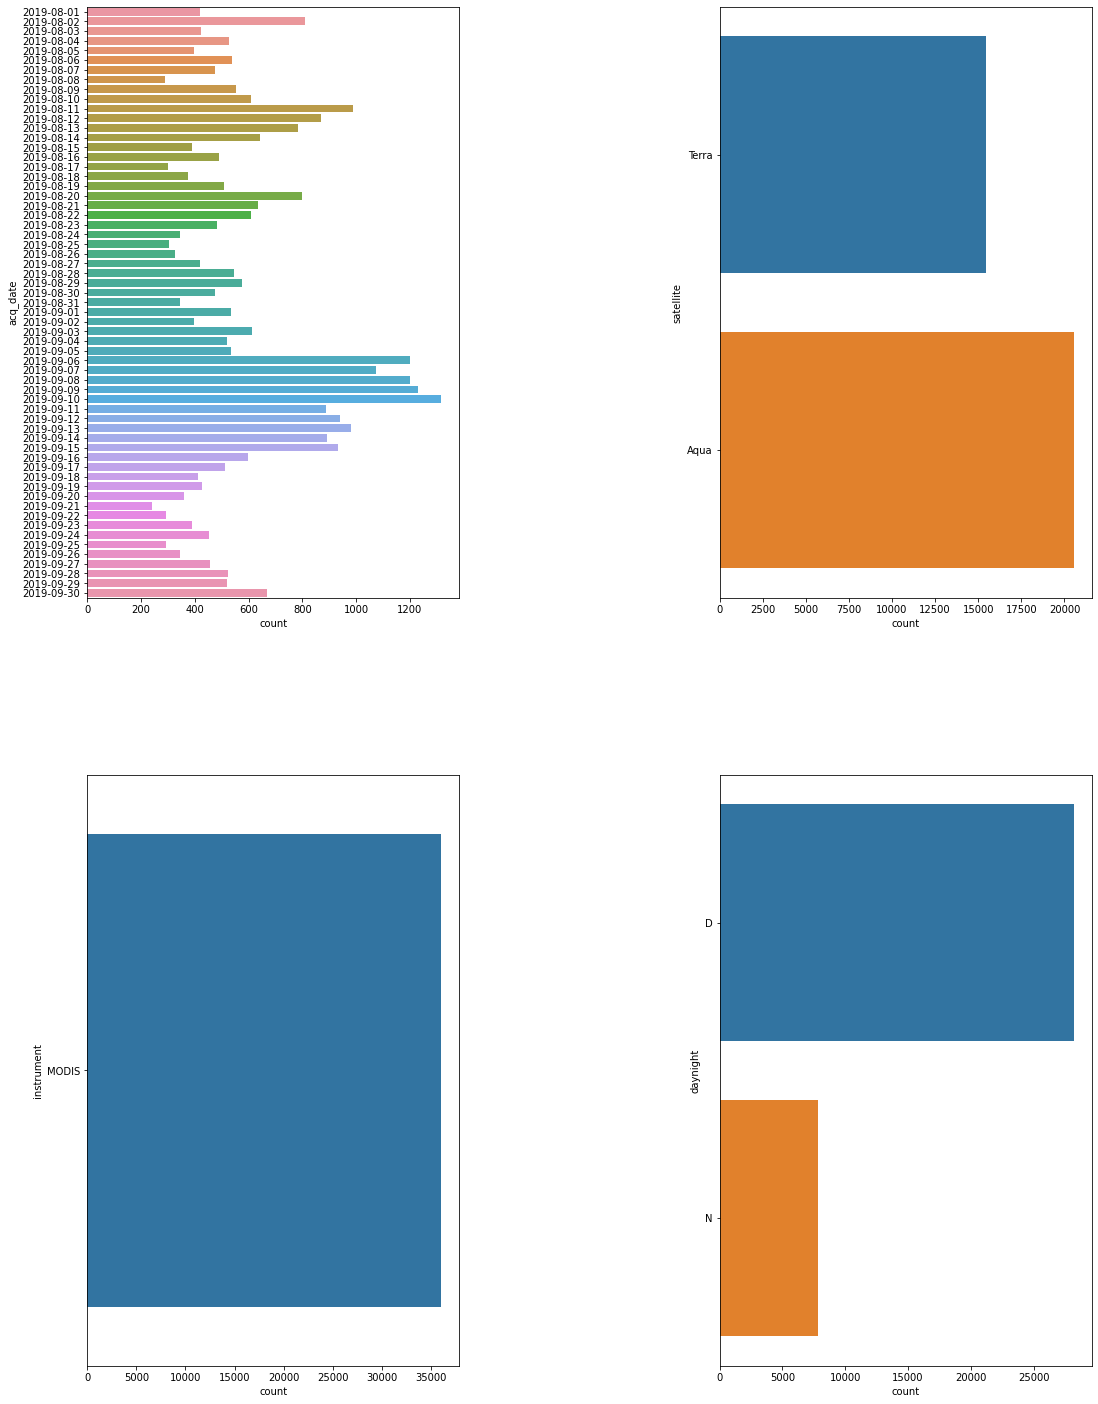

In [14]:
# visualizando os atributos categóricos
print('Variáveis Categóricas:')
categorical_vars = df.describe(include=[object]).columns
print(categorical_vars)

# gráfico de histograma dos atribitos categóricos
print('\nVisualização das distribuição dos dados')

fig, axes = plt.subplots(2, 2, figsize=(18, 25))

plt.subplots_adjust(left=None, bottom=None, 
                    right=None, top=None, 
                    wspace=0.7, hspace=0.3)

for i, ax in enumerate(axes.ravel()):
    if i > 10:
        ax.set_visible(False)
        continue

    sns.countplot(y=categorical_vars[i], 
                  data=df, ax=ax)

plt.show();

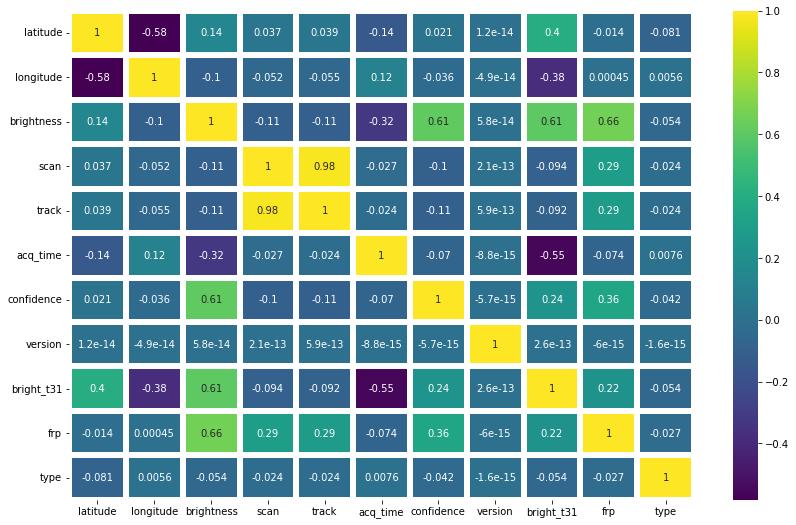

In [15]:
# mapa de calor da correlação entre as variáveis
plt.figure(figsize=(14, 9))
sns.heatmap(df.corr(), 
            annot=True, 
            cmap='viridis', 
            linewidths=5);

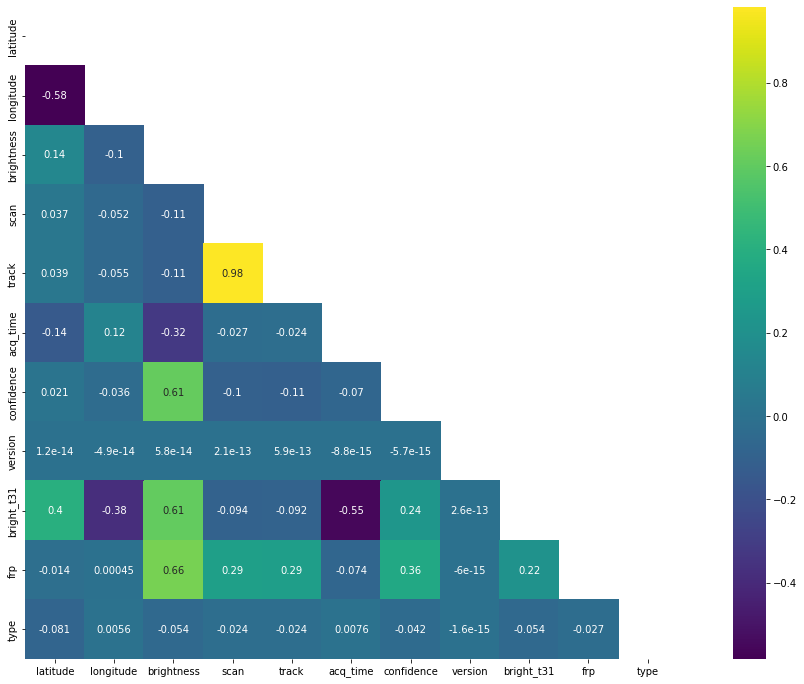

In [16]:
# plotando um parte do gráfico de calor da correlação entre as variáveis
correlation_matrix = df.corr()

mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20, 12))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    square=True,
    cmap='viridis'
);

> Vamos eliminar as variáveis altamente correlacionadas.
 - nesse caso, a `track`.

**Nota:** A propósito do conjunto de dados, não estamos descobrindo se o incêndio florestal acontece ou não, estamos tentando encontrar a confiança da ocorrência do incêndio florestal.

In [17]:
# eliminando o atributo "track"
df.drop(['track'], axis=1, inplace=True)
# df = df.drop(['scan', 'track'], axis=1)
# df.drop(['scan', 'track'], axis=1, inplace=True)

**Agora vamos explorar nosso atributo alvo, `confidence`.**

In [18]:
# contabilizando e visualizando as 15 primeiras instâncias mais presente
df['confidence'].value_counts().head(15)

100    3337
82      617
75      609
72      590
77      587
68      584
78      581
74      574
70      573
79      573
85      572
76      569
80      564
87      563
69      557
Name: confidence, dtype: int64

In [19]:
# contabilizando e visualizando as 15 últimas instâncias menos presente
df['confidence'].value_counts().tail(15)

16    68
14    55
12    46
11    45
9     39
13    37
10    34
8     27
7     20
3     16
5     15
6     15
4     12
2      4
1      4
Name: confidence, dtype: int64

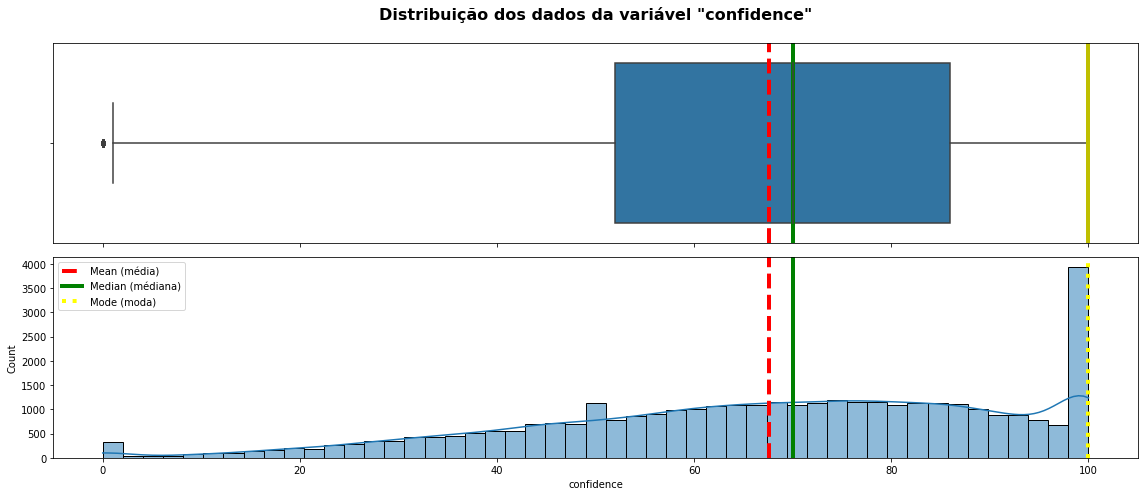

In [20]:
# plotando gráficos - boxplot e histograma da distribuição dos dados da variável "confidence"
mean = df['confidence'].mean()          # média
median = df['confidence'].median()      # mediana
mode = df['confidence'].mode()[0]       # moda

fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                      figsize = (16, 7))

sns.boxplot(data=df, x='confidence', ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--', linewidth=4)
ax_box.axvline(median, color='g', linestyle='-', linewidth=4)
ax_box.axvline(mode, color='y', linestyle='-', linewidth=4)
ax_box.set(xlabel='')
ax_box.set_title('Distribuição dos dados da variável "confidence"\n',
                 {'fontsize': 16,'fontweight': 'bold'})

sns.histplot(data=df, x='confidence', ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='red', linestyle='--', label='Mean (média)', linewidth=4)
ax_hist.axvline(median, color='green', linestyle='-', label='Median (médiana)', linewidth=4)
ax_hist.axvline(mode, color='yellow', linestyle=':', label='Mode (moda)', linewidth=4)

ax_hist.legend()
plt.tight_layout();


In [21]:
# contabilizando as instâncias únicas dos atributos
# e visualizando o tipo de dado de cada atributo
print(
    df.nunique(),
    df.dtypes,
    sep='\n\n'
)

latitude      30310
longitude     31127
brightness     1182
scan             39
acq_date         61
acq_time        662
satellite         2
instrument        1
confidence      101
version           1
bright_t31      590
frp            2976
daynight          2
type              3
dtype: int64

latitude      float64
longitude     float64
brightness    float64
scan          float64
acq_date       object
acq_time        int64
satellite      object
instrument     object
confidence      int64
version       float64
bright_t31    float64
frp           float64
daynight       object
type            int64
dtype: object


> A partir das informações acima, podemos ver que as colunas `instrument` e `version` têm apenas um valor recorrente, o que significa que não têm valor para nós. Portanto, vamos descartá-las por completo.<br>
E as colunas `satellite` e `dayninight` são do tipo categórico.<br>
Dito isso, podemos até usar a `scan`, pórem teremos que transforma-la em uma coluna de tipo de dados categórica. É o que faremos mais a frente!

In [22]:
# eliminando os atributos "instrument" e "version"
df.drop(['instrument', 'version'], axis=1, inplace=True)

In [23]:
# verificando se os atributos foram eliminados
df.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'acq_date', 'acq_time',
       'satellite', 'confidence', 'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

Para os atributos `daynight` e `satellite`, iremos realizar um mapeamento das instâncias categóricas e transforma-las em valores numéricos.

In [24]:
# criando dicionários do mapeamento dos atributos
daynight_map = {'D': 1, 'N': 0}
satelite_map = {'Terra': 1, 'Aqua': 0}

In [25]:
# aplicando os dicionarios nas respectivas colunas
df['daynight'] = df['daynight'].map(daynight_map)
df['satellite'] = df['satellite'].map(satelite_map)

In [26]:
# visualizando o tipo de dado das colunas em questão após aplicação da transformação
df[['daynight', 'satellite']].dtypes

daynight     int64
satellite    int64
dtype: object

In [27]:
# contabilizando as distribuições absoluta e relativa
print(
    df['daynight'].value_counts(),
    df['satellite'].value_counts(),
    df['daynight'].value_counts(normalize=True),
    df['satellite'].value_counts(normalize=True),
    sep='\n\n'
)

1    28203
0     7808
Name: daynight, dtype: int64

0    20541
1    15470
Name: satellite, dtype: int64

1    0.783177
0    0.216823
Name: daynight, dtype: float64

0    0.570409
1    0.429591
Name: satellite, dtype: float64


In [28]:
# contabilizando as distribuições absoluta e relativa do atributo "type"
print(
    df['type'].value_counts(),
    df['type'].value_counts(normalize=True),
    sep='\n\n'
)

0    35666
2      335
3       10
Name: type, dtype: int64

0    0.990420
2    0.009303
3    0.000278
Name: type, dtype: float64


**Aplicando a função do pandas, o `get_dummies` para tratamento das variáveis categóricas.**

In [29]:
# realizando o "one hot" no atributo "type" e instanciando o resultado no objeto "types"
types = pd.get_dummies(df['type'])

# concatenando o objeto "types" no conjunto de dados
df = pd.concat([df, types], axis=1)
df  # visualizando o conjunto de dados

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type,0,2,3
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,1,48,297.3,6.6,1,0,1,0,0
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,1,71,297.3,11.3,1,0,1,0,0
2,-12.8398,132.8744,311.6,3.1,2019-08-01,57,1,42,298.7,23.1,1,0,1,0,0
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,1,33,296.1,6.5,1,0,1,0,0
4,-12.4953,131.4897,310.3,4.0,2019-08-01,57,1,36,298.8,27.6,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36006,-28.0656,131.6334,312.7,1.2,2019-09-30,1644,0,85,292.9,14.2,0,0,1,0,0
36007,-28.2625,128.5494,304.9,1.0,2019-09-30,1644,0,27,290.9,6.4,0,0,1,0,0
36008,-28.2941,128.5123,301.7,1.0,2019-09-30,1644,0,43,290.4,5.5,0,0,1,0,0
36009,-28.3001,128.5530,303.6,1.0,2019-09-30,1644,0,41,290.3,5.7,0,0,1,0,0


In [30]:
# eliminado o atributo "type"
df.drop('type', axis=1, inplace=True)
df.columns  # visualizando o nome dos atributos presente no conjunto de dados

Index([  'latitude',  'longitude', 'brightness',       'scan',   'acq_date',
         'acq_time',  'satellite', 'confidence', 'bright_t31',        'frp',
         'daynight',            0,            2,            3],
      dtype='object')

In [31]:
# renomeando os atributos para melhor compreensão
df = df.rename(columns={0: 'type_0', 2: 'type_2', 3: 'type_3'})
df.columns   # visualizando o nome dos atributos presente no conjunto de dados

Index(['latitude', 'longitude', 'brightness', 'scan', 'acq_date', 'acq_time',
       'satellite', 'confidence', 'bright_t31', 'frp', 'daynight', 'type_0',
       'type_2', 'type_3'],
      dtype='object')

**Método Binning**

- Agora iremos converter a coluna `scan` para o tipo categórico, faremos isso usando o método de categorização.
- O intervalo para essas colunas foi de 1 a 4,8

In [32]:
bins = [0,1,2,3,4,5]
labels = [1,2,3,4,5]

df['scan_binned'] = pd.cut(df['scan'], bins=bins, labels=labels)
df.sample(10).T

,35067,4874,5913,13365,10543,32331,5254,17052,25181,17582
latitude,-12.3801,-30.8953,-11.4953,-30.865,-16.1575,-17.0757,-14.5419,-13.3952,-31.7048,-12.424
longitude,134.495,152.404,130.573,121.493,136.466,143.267,130.661,130.765,147.749,135.591
brightness,346.1,321.1,316.1,304.3,331.1,302.6,341.7,334.4,318.2,327.9
scan,1.9,1.5,1,1.2,1.3,1,1,2.1,2.2,1.2
acq_date,2019-09-29,2019-08-10,2019-08-11,2019-08-25,2019-08-20,2019-09-22,2019-08-11,2019-09-02,2019-09-11,2019-09-03
acq_time,506,1300,1349,151,128,1551,134,524,335,429
satellite,0,1,1,1,1,0,1,0,0,0
confidence,90,63,93,58,81,50,89,81,56,67
bright_t31,301,282.4,289,291.7,305.1,291.7,307.8,311.2,307.4,302.2
frp,101.2,38.3,15.6,5.4,30.3,4.4,34.2,52.7,14.4,20


Depois de realizado a transformação do atributo `scan` agora podemos eliminar a coluna em questão.

In [33]:
# eliminando o atributo "scan"
df.drop('scan', axis=1, inplace=True)

**Tratando da variáveis temporais**

In [34]:
# biblioteca para tratar variáveis temporais
import datetime as dt

In [35]:
# visualizando 5 amostras aleatórias da variável "acq_date"
df['acq_date'].sample(5)

26751    2019-09-13
35759    2019-09-30
9352     2019-08-17
7913     2019-08-14
28366    2019-09-14
Name: acq_date, dtype: object

> Podemos ver que a variável possui o tipo de dado `object`, ou seja, caracteres.<br>
Portanto teremos que transforma-la para o tipo de `datetime`, tipo data.

In [36]:
# realizando a transformação
df['acq_date'] = pd.to_datetime(df['acq_date'])

In [37]:
# agora iremos instanciar o dia, mês e ano em cada atributo distinto
df['year'] = df['acq_date'].dt.year
df['month'] = df['acq_date'].dt.month
df['day'] = df['acq_date'].dt.day

In [38]:
# visualizando a dimensão (linhas e colunas) e o tipo de dado em cada atributo
print(
    f'Dimensão do conjunto de dados: {df.shape}',
    f'ATRIBUTO \t TIPO DE DADO\n{df.dtypes}',
    sep='\n\n'
)

Dimensão do conjunto de dados: (36011, 17)

ATRIBUTO 	 TIPO DE DADO
latitude              float64
longitude             float64
brightness            float64
acq_date       datetime64[ns]
acq_time                int64
satellite               int64
confidence              int64
bright_t31            float64
frp                   float64
daynight                int64
type_0                  uint8
type_2                  uint8
type_3                  uint8
scan_binned          category
year                    int64
month                   int64
day                     int64
dtype: object


**Separando as variávies explicativa e a resposta**

In [39]:
# instanciando as variáveis explicativas (X) e a resposta (y)
X = df.drop(['confidence', 'acq_date', 'acq_time', 'bright_t31', 'type_0'], axis=1)
y = df['confidence']

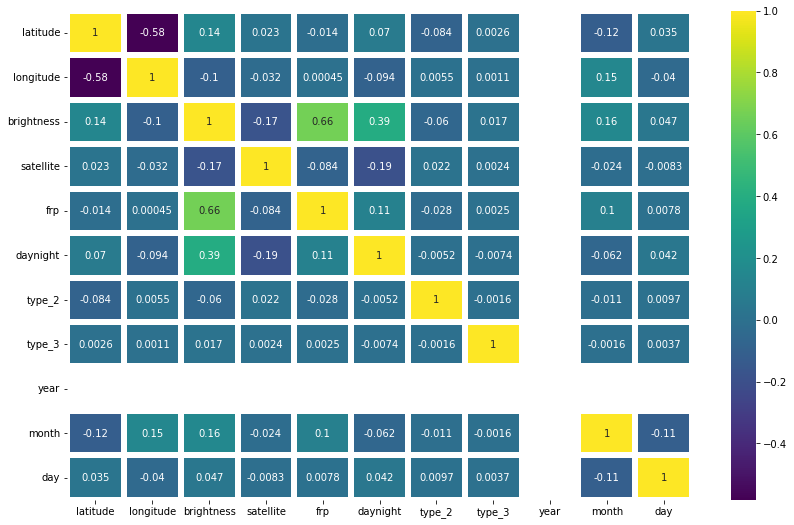

In [40]:
# visualizando novamente a correlação entre as variáveis
plt.figure(figsize=(14, 9))
sns.heatmap(X.corr(), 
            annot=True, 
            cmap='viridis', 
            linewidths=5);

In [41]:
# visualizando 5 amostras aleatórias da variavel explicativa
X.sample(5)

,latitude,longitude,brightness,satellite,frp,daynight,type_2,type_3,scan_binned,year,month,day
2369,-14.7146,130.7128,335.4,0,22.9,1,0,0,1,2019,8,5
27746,-12.0865,132.8183,338.9,1,33.9,1,0,0,2,2019,9,14
14002,-16.4107,136.7961,322.7,1,13.8,1,0,0,2,2019,8,27
458,-41.6216,148.1881,329.8,1,32.5,1,0,0,1,2019,8,2
13448,-12.9066,141.8090,323.5,0,19.1,1,0,0,2,2019,8,25


In [42]:
# verificando se há valores nulos
X.isnull().sum()

latitude       0
longitude      0
brightness     0
satellite      0
frp            0
daynight       0
type_2         0
type_3         0
scan_binned    0
year           0
month          0
day            0
dtype: int64

In [43]:
# se houver, há necessidade de elimina-los
X.dropna(inplace=True)

## **Dividindo os subconjuntos de dados em treinamento e teste**

In [44]:
# biblioteca para realizar o particionamento dos subconjuntos
from sklearn.model_selection import train_test_split

In [45]:
# realizando o particionamento dos subconjuntos em dados de treino e dados de teste
Xtrain, Xtest, ytrain, ytest = train_test_split(X.iloc[:, :500], 
                                                y,
                                                test_size=0.3,  # reservando 30% para teste
                                                random_state=42)

In [46]:
# contabilizando a quantidade de instâncias em cada parte dos dados de treino e teste
len(Xtrain), len(Xtest), len(ytrain), len(ytest)

(25207, 10804, 25207, 10804)

## **Criando a máquina preditiva**

Para esse caso, usaremos a função `RandomForestRegressor` da biblioteca do **scikit-learn**.

In [47]:
# importando a função
from sklearn.ensemble import RandomForestRegressor

In [48]:
# instanciando o modelo
rf_model = RandomForestRegressor(n_estimators=1_000, random_state=42, n_jobs=-1)

In [49]:
# realizando o treinamento do modelo com os dados de treino - Xtrain e ytrain
rf_model.fit(Xtrain, ytrain)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

In [50]:
# realizando as predições com modelo após seu treinamento com os dados de teste - Xtest
ypred = rf_model.predict(Xtest)

In [51]:
# visualizando as 20 primeiras predições
ypred[:20]

array([18.157, 40.707, 75.941, 53.543, 87.073, 85.277, 57.067, 51.542,
       55.564, 38.014, 59.28 , 45.923, 60.81 , 77.76 , 82.009, 48.204,
       87.373, 89.684, 99.424, 46.77 ])

In [52]:
# função para avaliação da acurácia do modelo
from sklearn.metrics import accuracy_score

In [53]:
print(
    f'Acurácia do treino: {(rf_model.score(Xtrain, ytrain)*100):.2f}%',
    f'Acurácia do teste: {(rf_model.score(Xtest, ytest)*100):.2f}%',
    sep='\n'
)

Acurácia do treino: 95.20%
Acurácia do teste: 66.29%


## **Salvando o modelo por módulo de decapagem usando o formato serializado**

In [54]:
# importando a biblioteca necessária
import pickle as pk

In [55]:
# salvando o modelo
saved_model = pk.dump(rf_model, 
                      open('RandomForestModel_1.pkl', 'wb'))

## **Model Tuning**

- A precisão não é tão grande, além disso, o modelo está superdimensionado
- Então, usaremos a função `RandomizedSearchCV` para otimizar os hiperparâmetros do modelo

In [56]:
# através da função "".get_params_" podemos visualizar os parâmetros padrão (default) que foram utlizados pelo modelo
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

**Otimizando os hiperparâmetros com o `RandomizedSearchCV`**

In [57]:
# importando a função
from sklearn.model_selection import RandomizedSearchCV

In [58]:
# instanciando os hiperparâmetros

# número de árvores na floresta
n_estimators = [int(x) for x in np.linspace(start=500, stop=1_500, num=20)]

# número máximo de recursos considerados para dividir um nó 
max_features = ['auto', 'sqrt']

# número máximo de níveis em cada árvore de decisão
max_depth = [int(x) for x in np.linspace(start=15, stop=50, num=5)]
max_depth.append(None)

# número mínimo de dados colocados em um nó antes que o nó seja dividido
min_samples_split = [2,3,5]

# número mínimo dde dados permitidos em cada folha
min_samples_leaf = [2,4,7]

In [59]:
# criando um objeto (dicionario) com os hiperparâmetros instanciados
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

# visualizando o obejto criado
random_grid

{'max_depth': [15, 23, 32, 41, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4, 7],
 'min_samples_split': [2, 3, 5],
 'n_estimators': [500,
  552,
  605,
  657,
  710,
  763,
  815,
  868,
  921,
  973,
  1026,
  1078,
  1131,
  1184,
  1236,
  1289,
  1342,
  1394,
  1447,
  1500]}

In [60]:
# instanciando o modelo com o objeto dos hiperparâmetros
rf_random = RandomizedSearchCV(estimator=rf_model,                  # modelo baseline
                               param_distributions=random_grid,     # dicionaŕio dos hiperparâmetros 
                               n_iter=3,                            # número de iterações que será realizado pelo modelo
                               cv=5,                                # quantidade de validação cruzada que será relaizada
                               verbose=3,                           # exibição dos resultados
                               random_state=42)                     # semente do modelo

# visualizando o modelo
rf_random

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=1000, n_jobs=-1,
                                                   random_state=42),
                   n_iter=3,
                   param_distributions={'max_depth': [15, 23, 32, 41, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 4, 7],
                                        'min_samples_split': [2, 3, 5],
                                        'n_estimators': [500, 552, 605, 657,
                                                         710, 763, 815, 868,
                                                         921, 973, 1026, 1078,
                                                         1131, 1184, 1236, 1289,
                                                         1342, 1394, 1447,
                                                         1500]},
                   random_state=42, verbose=

In [61]:
# realizando o treinamento do modelo com os dados de treino - Xtrain e ytrain
rf_random.fit(Xtrain, ytrain)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END max_depth=32, max_features=auto, min_samples_leaf=7, min_samples_split=3, n_estimators=500;, score=0.635 total time=  31.8s
[CV 2/5] END max_depth=32, max_features=auto, min_samples_leaf=7, min_samples_split=3, n_estimators=500;, score=0.635 total time=  29.3s
[CV 3/5] END max_depth=32, max_features=auto, min_samples_leaf=7, min_samples_split=3, n_estimators=500;, score=0.654 total time=  29.3s
[CV 4/5] END max_depth=32, max_features=auto, min_samples_leaf=7, min_samples_split=3, n_estimators=500;, score=0.642 total time=  29.1s
[CV 5/5] END max_depth=32, max_features=auto, min_samples_leaf=7, min_samples_split=3, n_estimators=500;, score=0.649 total time=  29.0s
[CV 1/5] END max_depth=41, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1236;, score=0.649 total time=  31.0s
[CV 2/5] END max_depth=41, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1236;, score=0.65

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=1000, n_jobs=-1,
                                                   random_state=42),
                   n_iter=3,
                   param_distributions={'max_depth': [15, 23, 32, 41, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 4, 7],
                                        'min_samples_split': [2, 3, 5],
                                        'n_estimators': [500, 552, 605, 657,
                                                         710, 763, 815, 868,
                                                         921, 973, 1026, 1078,
                                                         1131, 1184, 1236, 1289,
                                                         1342, 1394, 1447,
                                                         1500]},
                   random_state=42, verbose=

**Obtendo o melhor parâmetro**

In [62]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=41, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=3, n_estimators=1236, n_jobs=-1,
                      random_state=42)

**Criando a `máquina preditiva` com os melhores hiperparâmetros**

In [63]:
new_model_rf = RandomForestRegressor(n_estimators=1236,
                                     min_samples_split=3,
                                     min_samples_leaf=2,
                                     max_features='sqrt',
                                     max_depth=41, 
                                     n_jobs=-1,
                                     random_state=42)

In [64]:
# realizando o treinamento es prediçẽos com o novo modelo
new_model_rf.fit(Xtrain, ytrain)
ypred_new = new_model_rf.predict(Xtest)

In [65]:
# visualizando acurácia do novo modelo
print(
    f'Acurácia do treino: {(new_model_rf.score(Xtrain, ytrain)*100):.2f}%',
    f'Acurácia do teste: {(new_model_rf.score(Xtest, ytest)*100):.2f}%',
    sep='\n'
)

Acurácia do treino: 87.51%
Acurácia do teste: 67.61%


**Salvando o modelo ajustado pelo módulo de decapagem usando o formato serializado**

In [66]:
saved_model = pk.dump(new_model_rf, 
                      open('RandomForestModel_2.pkl', 'wb'))

**Carregando o modelo**

In [67]:
# # carregando o modelo
# reg_from_pickle = pk.load(saved_model)

# # usando para relaizando novas prediçẽos
# reg_from_pickle.predict(Xtest)

## **bz2file**

**O que é bz2file?**

`bz2file` é um dos módulos em python que são responsáveis ​​pela compactação e descompactação de arquivos, portanto, pode ajudar a diminuir o arquivo serializado ou desserializado para um tamanho menor, o que será muito útil a longo prazo, quando temos grandes conjuntos de dados

**Como o bz2file é útil aqui?**

Como sabemos que nosso conjunto de dados tem mais de 2,7 MB e nosso modelo de floresta aleatória tem mais de 700 MB, precisamos compactar isso para que esse modelo não seja uma situação agitada de armazenamento.

**Como instalar o bz2file?**

- Notebook Jupyter: !pip install bz2file
- Prompt do Anaconda / CMD: pip install bz2file

Por isso instalei o bz2file, que é usado para compactar dados. Este é um pacote para aqueles que têm pouco espaço no disco, mas desejam armazenar ou usar grandes conjuntos de dados.

O arquivo que tinha mais de 800 MB, usando o bz2 para compactar agora possui ou pouco mais de 149 MB.

**Compactando o arquivo da máquina preditiva**

In [68]:
# importando a biblioteca
import bz2

In [69]:
# instanciando as variáveis necessárias para compactação do modelo
compressionLevel = 9
source_file = 'RandomForestModel_2.pkl'
destination_file = 'RandomForestModel_2.bz2'

In [70]:
# realizando a compactação do modelo
with open(source_file, 'rb') as data:
    tarbz2contents = bz2.compress(data.read(), compressionLevel)

In [71]:
# salvando o arquivo
fh = open(destination_file, 'wb')
fh.write(tarbz2contents)
fh.close()